In [15]:
import os  
import requests
import numpy as np
import pandas as pd
import regex
import json
from dotenv import load_dotenv
from time import sleep

load_dotenv()
cards_df = pd.read_csv("all_cards_master_data.csv")

In [16]:
print("Dataset Overview:")
print("="*60)
print(f"Shape: {cards_df.shape}")
print(f"\nColumns: {list(cards_df.columns)}")
print(f"\nGames included: {cards_df['game'].unique().tolist()}")
print(f"\nFirst few rows:")
display(cards_df.head())

print(f"\nData types:")
print(cards_df.dtypes)

print(f"\nCards per game:")
print(cards_df.groupby('game')['card_id'].nunique())

Dataset Overview:
Shape: (48134, 62)

Columns: ['game', 'set_name', 'card_id', 'card_name', 'number', 'rarity', 'set', 'set_name_api', 'tcgplayerId', 'details', 'variant_id', 'condition', 'printing', 'language', 'tcgplayerSkuId', 'price', 'lastUpdated', 'priceChange24hr', '7d_priceChange', '7d_avgPrice', '7d_minPrice', '7d_maxPrice', '7d_stddevPopPrice', '7d_covPrice', '7d_iqrPrice', '7d_trendSlope', '7d_priceChangesCount', '7d_priceRelativeToRange', '30d_priceChange', '30d_avgPrice', '30d_minPrice', '30d_maxPrice', '30d_stddevPopPrice', '30d_covPrice', '30d_iqrPrice', '30d_trendSlope', '30d_priceChangesCount', '30d_priceRelativeToRange', '90d_priceChange', '90d_avgPrice', '90d_minPrice', '90d_maxPrice', '90d_stddevPopPrice', '90d_covPrice', '90d_iqrPrice', '90d_trendSlope', '90d_priceChangesCount', '90d_priceRelativeToRange', '1y_priceChange', '1y_avgPrice', '1y_minPrice', '1y_maxPrice', '1y_stddevPopPrice', '1y_covPrice', '1y_iqrPrice', '1y_trendSlope', '1y_priceChangesCount', '1y_pr

,game,set_name,card_id,card_name,number,rarity,set,set_name_api,tcgplayerId,details,...,1y_stddevPopPrice,1y_covPrice,1y_iqrPrice,1y_trendSlope,1y_priceChangesCount,1y_priceRelativeToRange,minPriceAllTime,minPriceAllTimeDate,maxPriceAllTime,maxPriceAllTimeDate
0,Pokemon,ME02: Phantasmal Flames,pokemon-me02-phantasmal-flames-phantasmal-flam...,Phantasmal Flames Booster Box Case,NaN,NaN,me02-phantasmal-flames-pokemon,ME02: Phantasmal Flames,655281,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pokemon,ME02: Phantasmal Flames,pokemon-me02-phantasmal-flames-phantasmal-flam...,Phantasmal Flames Booster Bundle Case,NaN,NaN,me02-phantasmal-flames-pokemon,ME02: Phantasmal Flames,654162,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pokemon,ME02: Phantasmal Flames,pokemon-me02-phantasmal-flames-phantasmal-flam...,Phantasmal Flames Elite Trainer Box Case,NaN,NaN,me02-phantasmal-flames-pokemon,ME02: Phantasmal Flames,654170,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pokemon,ME02: Phantasmal Flames,pokemon-me02-phantasmal-flames-phantasmal-flam...,Phantasmal Flames Sleeved Booster Case,NaN,NaN,me02-phantasmal-flames-pokemon,ME02: Phantasmal Flames,655282,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon,ME02: Phantasmal Flames,pokemon-me02-phantasmal-flames-mega-charizard-...,Mega Charizard X ex - 125/094,125/094,Special Illustration Rare,me02-phantasmal-flames-pokemon,ME02: Phantasmal Flames,662184,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Data types:
game                        object
set_name                    object
card_id                     object
card_name                   object
number                      object
                            ...   
1y_priceRelativeToRange    float64
minPriceAllTime            float64
minPriceAllTimeDate        float64
maxPriceAllTime            float64
maxPriceAllTimeDate        float64
Length: 62, dtype: object

Cards per game:
game
Disney Lorcana          884
Pokemon                1488
YuGiOh                 3415
digimon-card-game      2095
mtg                    5379
one-piece-card-game    2242
Name: card_id, dtype: int64


In [17]:
print("Dataset Description:")
print(cards_df.describe().T)

Dataset Description:
                            count          mean           std           min  \
tcgplayerId               48134.0  5.893615e+05  4.227005e+04  2.552160e+05   
details                       0.0           NaN           NaN           NaN   
tcgplayerSkuId            41081.0  8.271355e+06  4.051648e+05  5.326870e+06   
price                     48134.0  2.343014e+01  2.729192e+02  1.000000e-02   
lastUpdated               48134.0  1.762905e+09  2.950240e+06  1.742989e+09   
priceChange24hr           43162.0 -1.249988e-02  4.003280e+00 -4.620000e+01   
7d_priceChange            43426.0 -4.909395e-01  1.338988e+01 -9.470000e+01   
7d_avgPrice                   0.0           NaN           NaN           NaN   
7d_minPrice               43426.0  2.257347e+01  2.557742e+02  1.000000e-02   
7d_maxPrice               43426.0  2.315290e+01  2.658858e+02  1.000000e-02   
7d_stddevPopPrice         43426.0  2.049680e-01  7.927856e+00  0.000000e+00   
7d_covPrice               43426

Missing Data Summary:
                          Missing_Count  Missing_Percentage
maxPriceAllTimeDate               48134          100.000000
7d_avgPrice                       48134          100.000000
7d_priceRelativeToRange           48134          100.000000
1y_priceChange                    48134          100.000000
1y_avgPrice                       48134          100.000000
1y_stddevPopPrice                 48134          100.000000
1y_covPrice                       48134          100.000000
details                           48134          100.000000
1y_iqrPrice                       48134          100.000000
1y_trendSlope                     48134          100.000000
1y_priceChangesCount              48134          100.000000
1y_priceRelativeToRange           48134          100.000000
minPriceAllTime                   48134          100.000000
minPriceAllTimeDate               48134          100.000000
maxPriceAllTime                   48134          100.000000
30d_priceRelativeT

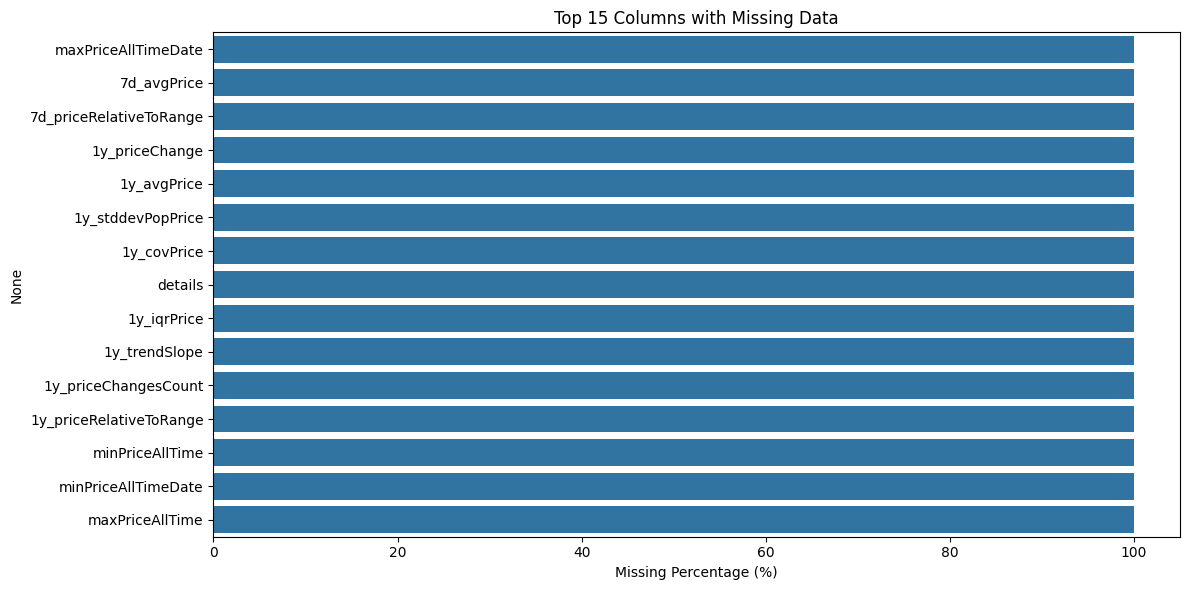

In [18]:
# Check for missing values
missing_data = cards_df.isnull().sum()
missing_pct = (missing_data / len(cards_df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_pct
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Data Summary:")
print("="*60)
print(missing_df[missing_df['Missing_Count'] > 0].head(20))

# Visualize missing data for key columns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
top_missing = missing_df[missing_df['Missing_Count'] > 0].head(15)
sns.barplot(x=top_missing['Missing_Percentage'], y=top_missing.index)
plt.xlabel('Missing Percentage (%)')
plt.title('Top 15 Columns with Missing Data')
plt.tight_layout()
plt.show()

Game Statistics:
                     Unique_Cards  Total_Variants  Avg_Price  Median_Price  \
game                                                                         
Disney Lorcana                884            3435      12.99          1.18   
Pokemon                      1488            4745      37.30          4.08   
YuGiOh                       3415            9084       9.23          1.08   
digimon-card-game            2095            4292      17.01          2.11   
mtg                          5379           21535      28.03          4.05   
one-piece-card-game          2242            5043      28.87          1.33   

                     Std_Price  Min_Price  Max_Price  
game                                                  
Disney Lorcana           51.62       0.01    1386.33  
Pokemon                 205.91       0.01    7000.00  
YuGiOh                   32.86       0.01    1836.75  
digimon-card-game        76.87       0.01    1499.98  
mtg                     385.

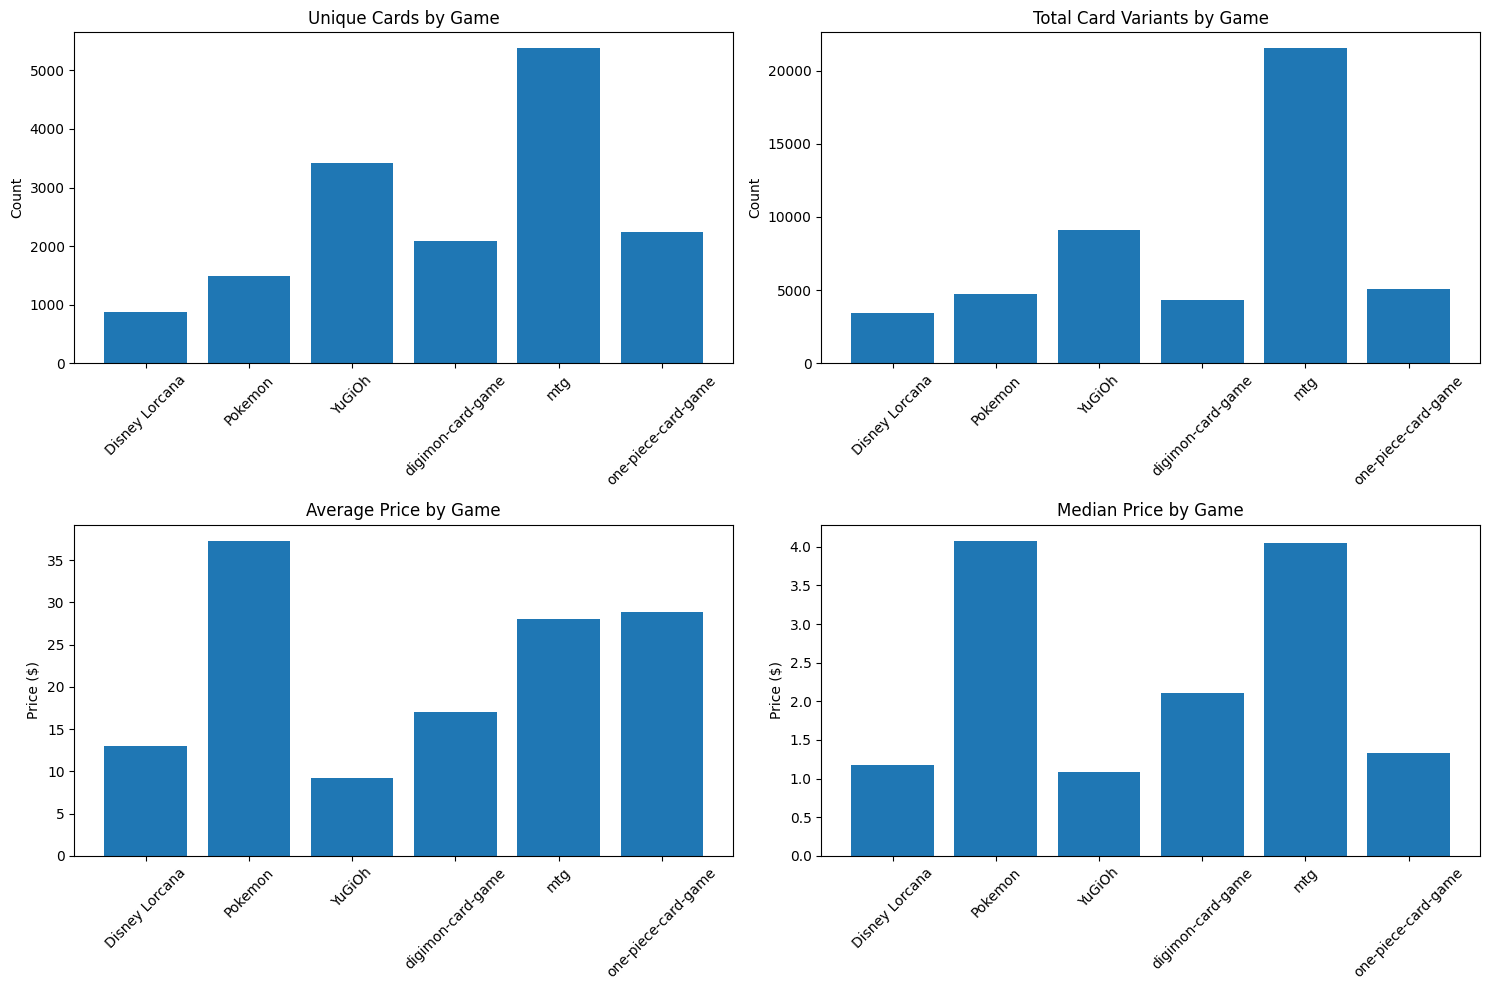

In [19]:
# Analyze distribution by game
game_stats = cards_df.groupby('game').agg({
    'card_id': 'nunique',
    'variant_id': 'count',
    'price': ['mean', 'median', 'std', 'min', 'max']
}).round(2)

game_stats.columns = ['Unique_Cards', 'Total_Variants', 'Avg_Price', 'Median_Price', 'Std_Price', 'Min_Price', 'Max_Price']
print("Game Statistics:")
print("="*60)
print(game_stats)

# Visualize game distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Number of unique cards by game
axes[0, 0].bar(game_stats.index, game_stats['Unique_Cards'])
axes[0, 0].set_title('Unique Cards by Game')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Total variants by game
axes[0, 1].bar(game_stats.index, game_stats['Total_Variants'])
axes[0, 1].set_title('Total Card Variants by Game')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Average price by game
axes[1, 0].bar(game_stats.index, game_stats['Avg_Price'])
axes[1, 0].set_title('Average Price by Game')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Median price by game
axes[1, 1].bar(game_stats.index, game_stats['Median_Price'])
axes[1, 1].set_title('Median Price by Game')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

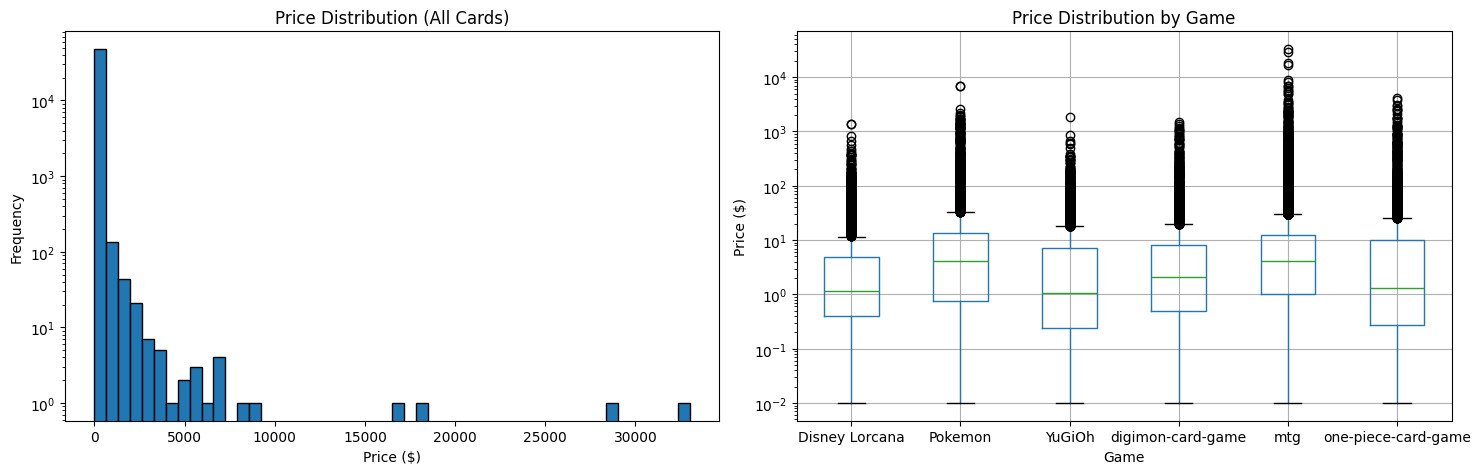


Price Statistics:
count    48134.000000
mean        23.430140
std        272.919182
min          0.010000
25%          0.530000
50%          2.750000
75%         10.400000
max      32999.990000
Name: price, dtype: float64

Price Skewness: 75.83
Price Kurtosis: 7691.20


In [20]:
# Overall price distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram with log scale
axes[0].hist(cards_df['price'].dropna(), bins=50, edgecolor='black')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution (All Cards)')
axes[0].set_yscale('log')

# Box plot by game
cards_df.boxplot(column='price', by='game', ax=axes[1], figsize=(10, 6))
axes[1].set_xlabel('Game')
axes[1].set_ylabel('Price ($)')
axes[1].set_title('Price Distribution by Game')
axes[1].set_yscale('log')
plt.suptitle('')

plt.tight_layout()
plt.show()

# Price statistics
print("\nPrice Statistics:")
print("="*60)
print(cards_df['price'].describe())
print(f"\nPrice Skewness: {cards_df['price'].skew():.2f}")
print(f"Price Kurtosis: {cards_df['price'].kurtosis():.2f}")

Condition Statistics:
                   Count  Avg_Price  Median_Price  Std_Price
condition                                                   
Sealed              1028     373.94         50.14    1425.55
Near Mint          18760      20.45          2.11     262.46
Lightly Played     15387      14.37          2.00      64.17
Moderately Played   7282      11.36          3.61      33.46
Damaged             3542       9.94          3.58      26.91
Heavily Played      2135       9.72          3.99      30.49


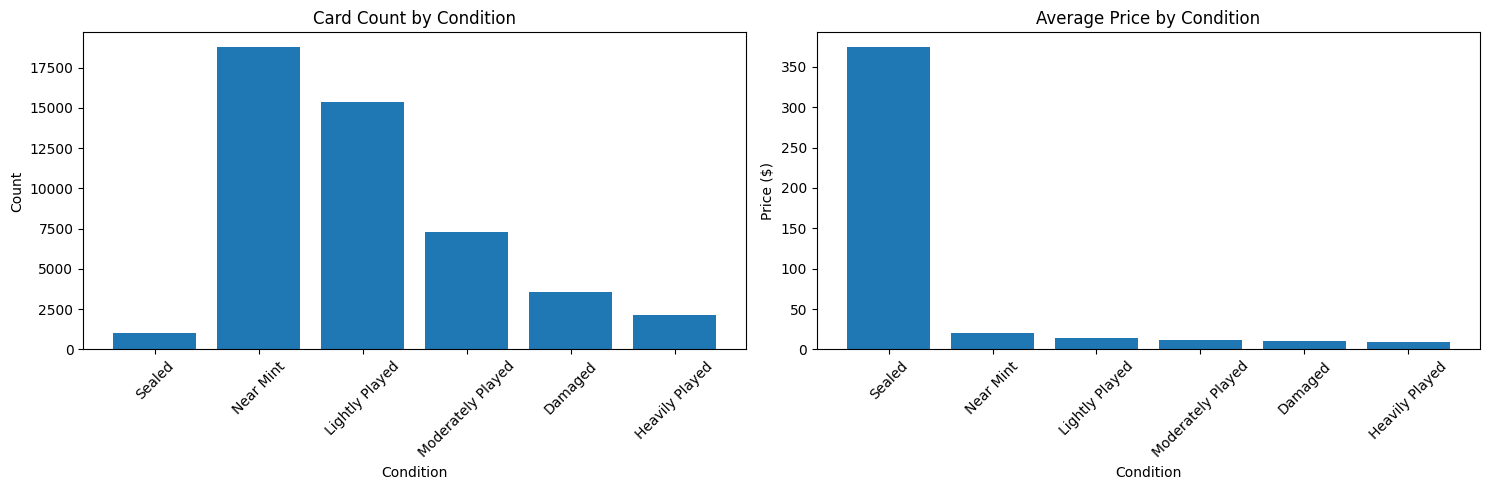

In [21]:
# Analyze condition distribution and pricing
condition_stats = cards_df.groupby('condition').agg({
    'variant_id': 'count',
    'price': ['mean', 'median', 'std']
}).round(2)
condition_stats.columns = ['Count', 'Avg_Price', 'Median_Price', 'Std_Price']
condition_stats = condition_stats.sort_values('Avg_Price', ascending=False)

print("Condition Statistics:")
print("="*60)
print(condition_stats)

# Visualize condition impact on price
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count by condition
axes[0].bar(condition_stats.index, condition_stats['Count'])
axes[0].set_title('Card Count by Condition')
axes[0].set_xlabel('Condition')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Average price by condition
axes[1].bar(condition_stats.index, condition_stats['Avg_Price'])
axes[1].set_title('Average Price by Condition')
axes[1].set_xlabel('Condition')
axes[1].set_ylabel('Price ($)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Top 20 Rarities by Average Price:
                             Unique_Cards  Avg_Price  Median_Price  \
rarity                                                               
Iconic                                  4     957.39        820.59   
Mega Hyper Rare                         3     480.13        471.97   
Black White Rare                        4     406.55        389.88   
Special Rare                           40     167.47        138.43   
Special Illustration Rare             129      77.75         35.93   
Enchanted                             144      74.86         58.49   
Ghost Rare                              1      46.09         52.96   
Secret Rare                           491      44.70          5.20   
Emblazoned Secret Rare                 21      42.70          8.84   
DON!!                                  90      42.37         13.31   
Mythic                               1271      35.51          9.25   
Leader                                144      34.30    

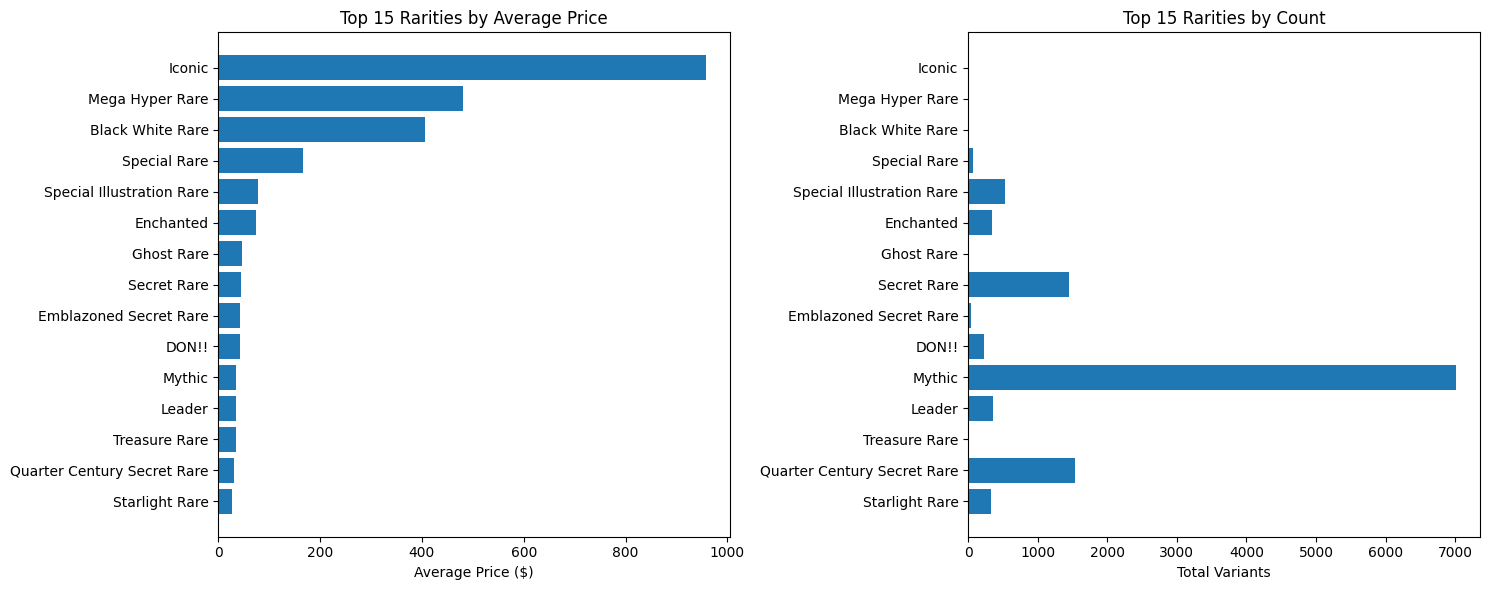

In [22]:
# Analyze rarity distribution
rarity_stats = cards_df.groupby('rarity').agg({
    'card_id': 'nunique',
    'price': ['mean', 'median', 'count']
}).round(2)
rarity_stats.columns = ['Unique_Cards', 'Avg_Price', 'Median_Price', 'Total_Variants']
rarity_stats = rarity_stats.sort_values('Avg_Price', ascending=False)

print("Top 20 Rarities by Average Price:")
print("="*60)
print(rarity_stats.head(20))

# Visualize top rarities
top_rarities = rarity_stats.head(15)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].barh(range(len(top_rarities)), top_rarities['Avg_Price'])
axes[0].set_yticks(range(len(top_rarities)))
axes[0].set_yticklabels(top_rarities.index)
axes[0].set_xlabel('Average Price ($)')
axes[0].set_title('Top 15 Rarities by Average Price')
axes[0].invert_yaxis()

axes[1].barh(range(len(top_rarities)), top_rarities['Total_Variants'])
axes[1].set_yticks(range(len(top_rarities)))
axes[1].set_yticklabels(top_rarities.index)
axes[1].set_xlabel('Total Variants')
axes[1].set_title('Top 15 Rarities by Count')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

Price Change Statistics Across Timeframes:
                   count      mean         std    min    25%  50%   75%  \
priceChange24hr  43162.0 -0.012500    4.003280 -46.20   0.00  0.0  0.00   
7d_priceChange   43426.0 -0.490940   13.389883 -94.70  -0.65  0.0  0.00   
30d_priceChange  44306.0 -1.216728   33.864824 -99.05  -7.08  0.0  0.51   
90d_priceChange  45921.0  3.951665  294.472367 -99.37 -16.28  0.0  5.00   
1y_priceChange       0.0       NaN         NaN    NaN    NaN  NaN   NaN   

                      max  
priceChange24hr    350.00  
7d_priceChange     783.33  
30d_priceChange   1950.00  
90d_priceChange  46152.00  
1y_priceChange        NaN  


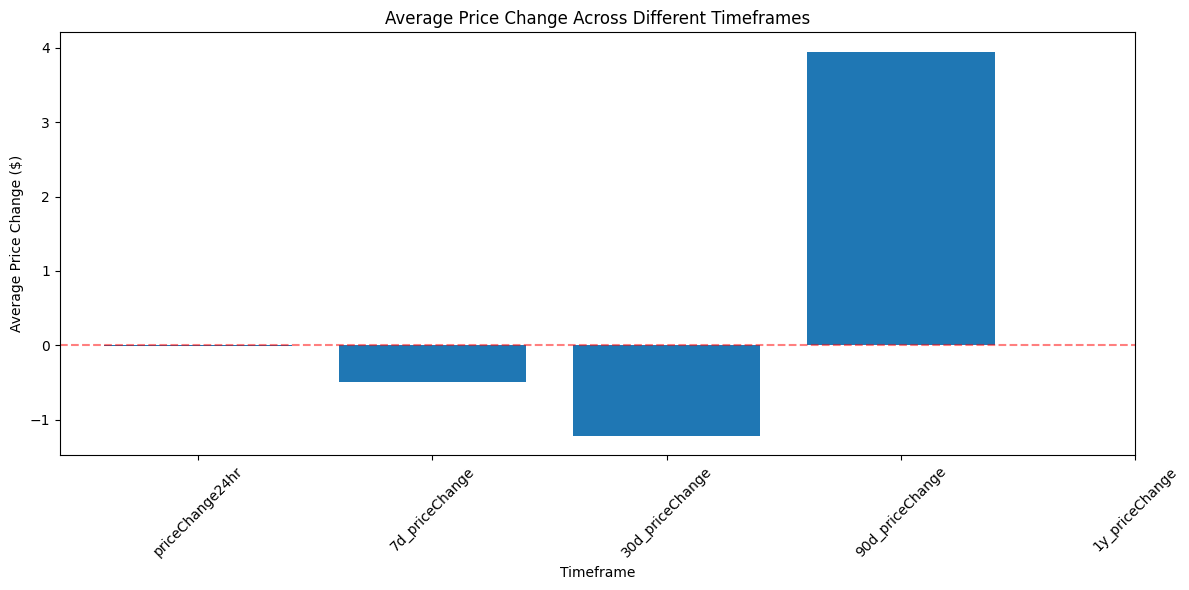


Cards with Highest 30-Day Price Increase:
               game                                       card_name         condition  price  30d_priceChange
     Disney Lorcana                        King Candy - Royal Racer Moderately Played   0.82          1950.00
             YuGiOh                                    Gravity Bind    Lightly Played   0.18          1700.00
one-piece-card-game                           St. Shepherd Ju Peter    Lightly Played   0.51          1600.00
             YuGiOh The Dragon that Devours the Dogma (Secret Rare)         Near Mint   4.17          1245.16
                mtg                 Thieving Varmint (Extended Art)         Near Mint   6.00          1124.49
                mtg                              Surtr, Fiery Jotun    Lightly Played  12.11          1042.45
one-piece-card-game            Jewelry Bonney (100) (Alternate Art)         Near Mint  21.17           963.82
one-piece-card-game                            Monkey.D.Luffy (001)         N

In [23]:
# Analyze price changes across different timeframes
price_change_cols = ['priceChange24hr', '7d_priceChange', '30d_priceChange', '90d_priceChange', '1y_priceChange']
existing_cols = [col for col in price_change_cols if col in cards_df.columns]

if existing_cols:
    price_changes = cards_df[existing_cols].describe().T
    print("Price Change Statistics Across Timeframes:")
    print("="*60)
    print(price_changes)
    
    # Visualize average price changes
    avg_changes = cards_df[existing_cols].mean()
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(avg_changes)), avg_changes.values)
    plt.xticks(range(len(avg_changes)), avg_changes.index, rotation=45)
    plt.xlabel('Timeframe')
    plt.ylabel('Average Price Change ($)')
    plt.title('Average Price Change Across Different Timeframes')
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
    # Identify cards with highest price increases
    print("\nCards with Highest 30-Day Price Increase:")
    if '30d_priceChange' in cards_df.columns:
        top_gainers = cards_df.nlargest(10, '30d_priceChange')[['game', 'card_name', 'condition', 'price', '30d_priceChange']]
        print(top_gainers.to_string(index=False))
else:
    print("Price change columns not found in dataset")

Price Volatility (Coefficient of Variation) by Game:
                     7d_covPrice  30d_covPrice  90d_covPrice
game                                                        
Disney Lorcana            0.0208        0.0648        0.1344
Pokemon                   0.0299        0.0596        0.0958
YuGiOh                    0.0179        0.0546        0.1187
digimon-card-game         0.0147        0.0577        0.1229
mtg                       0.0127        0.0346        0.0761
one-piece-card-game       0.0206        0.0602        0.1143


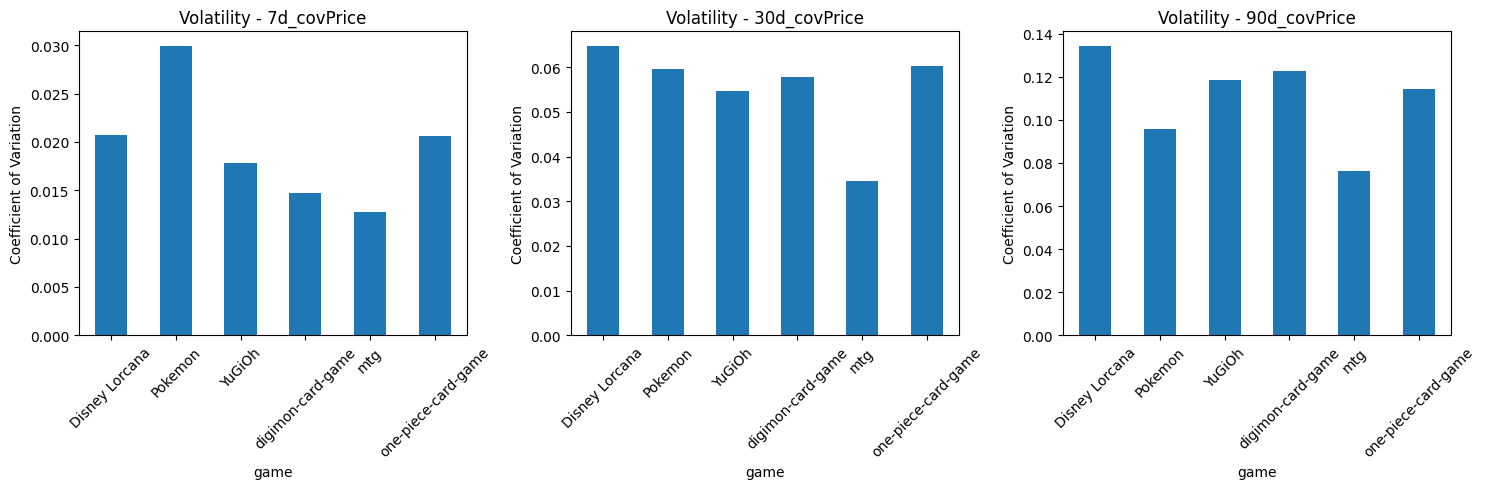


Most Volatile Cards (30-day):
          game                            card_name condition  price  30d_covPrice  30d_stddevPopPrice
Disney Lorcana      Shere Khan - Fierce and Furious Near Mint   0.28      1.698090                1.52
Disney Lorcana      Coldstone - Reincarnated Cyborg Near Mint   0.15      1.671509                1.67
Disney Lorcana   Lady Tremaine - Sinister Socialite Near Mint   0.28      1.650440                2.52
Disney Lorcana   Scrooge McDuck - Cavern Prospector Near Mint   0.30      1.576313                3.75
Disney Lorcana               Megara - Secret Keeper Near Mint   0.25      1.569112                3.59
           mtg                   Morbid Opportunist Near Mint   0.18      1.527117                0.44
Disney Lorcana Fairy Godmother - Magical Benefactor Near Mint   0.25      1.522420                1.49
Disney Lorcana     Little John - Impermanent Outlaw Near Mint   0.35      1.500057                1.46
Disney Lorcana          Judy Hopps - Lead 

In [24]:
# Analyze price volatility using coefficient of variation
cov_cols = ['7d_covPrice', '30d_covPrice', '90d_covPrice']
existing_cov_cols = [col for col in cov_cols if col in cards_df.columns]

if existing_cov_cols:
    print("Price Volatility (Coefficient of Variation) by Game:")
    print("="*60)
    
    volatility_by_game = cards_df.groupby('game')[existing_cov_cols].mean()
    print(volatility_by_game.round(4))
    
    # Visualize volatility
    fig, axes = plt.subplots(1, len(existing_cov_cols), figsize=(15, 5))
    if len(existing_cov_cols) == 1:
        axes = [axes]
    
    for idx, col in enumerate(existing_cov_cols):
        volatility_by_game[col].plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f'Volatility - {col}')
        axes[idx].set_ylabel('Coefficient of Variation')
        axes[idx].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Most volatile cards
    if '30d_covPrice' in cards_df.columns:
        print("\nMost Volatile Cards (30-day):")
        volatile_cards = cards_df.nlargest(10, '30d_covPrice')[['game', 'card_name', 'condition', 'price', '30d_covPrice', '30d_stddevPopPrice']]
        print(volatile_cards.to_string(index=False))
else:
    print("Volatility columns not found in dataset")

Top 20 Most Expensive Cards:
               game                                                                  card_name rarity condition    price
                mtg                                               The Soul Stone (Cosmic Foil) Mythic Near Mint 32999.99
                mtg                      FINAL FANTASY - Collector Booster Display Master Case    NaN    Sealed 28496.88
                mtg                Marvel's Spider-Man - Collector Booster Display Master Case    NaN    Sealed 18000.00
                mtg          Universes Beyond: Fallout - Collector Booster Display Master Case    NaN    Sealed 16952.86
                mtg   Magic: The Gathering Foundations - Collector Booster Display Master Case    NaN    Sealed  8999.95
                mtg                             FINAL FANTASY - Collector Booster Display Case    NaN    Sealed  8096.30
            Pokemon                            Prismatic Evolution Booster Bundle Display Case    NaN    Sealed  7000.00
   

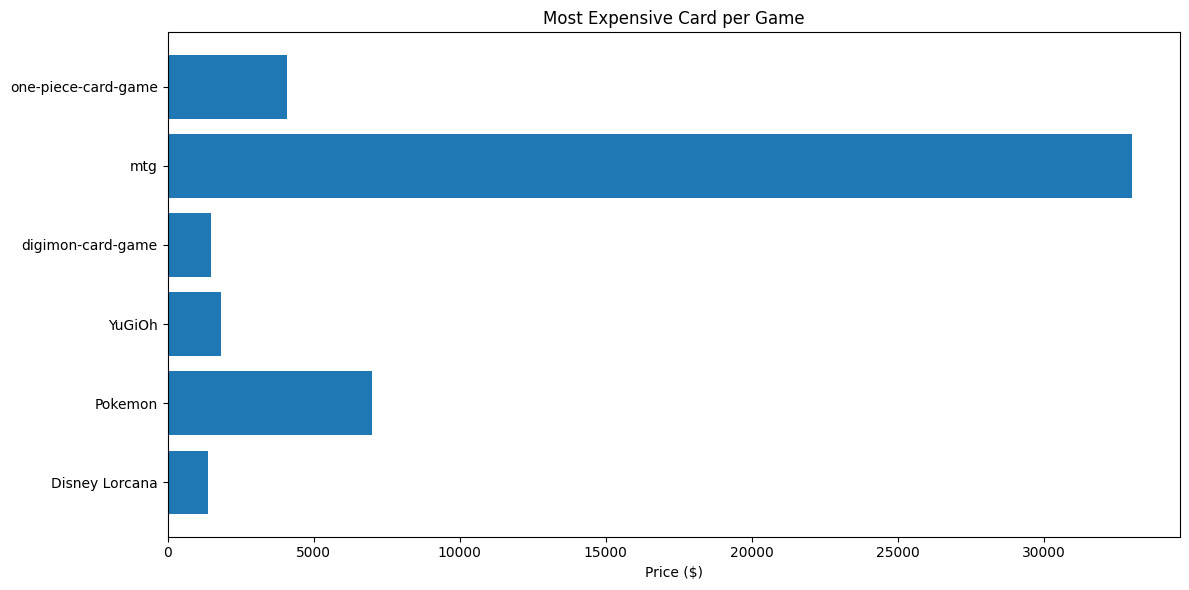

In [25]:
# Identify most expensive cards overall
print("Top 20 Most Expensive Cards:")
print("="*60)
top_expensive = cards_df.nlargest(20, 'price')[['game', 'card_name', 'rarity', 'condition', 'price']]
print(top_expensive.to_string(index=False))

# Most expensive by game
print("\n\nMost Expensive Card per Game:")
print("="*60)
most_expensive_per_game = cards_df.loc[cards_df.groupby('game')['price'].idxmax()][['game', 'card_name', 'rarity', 'condition', 'price']]
print(most_expensive_per_game.to_string(index=False))

# Visualize
plt.figure(figsize=(12, 6))
plt.barh(most_expensive_per_game['game'], most_expensive_per_game['price'])
plt.xlabel('Price ($)')
plt.title('Most Expensive Card per Game')
plt.tight_layout()
plt.show()

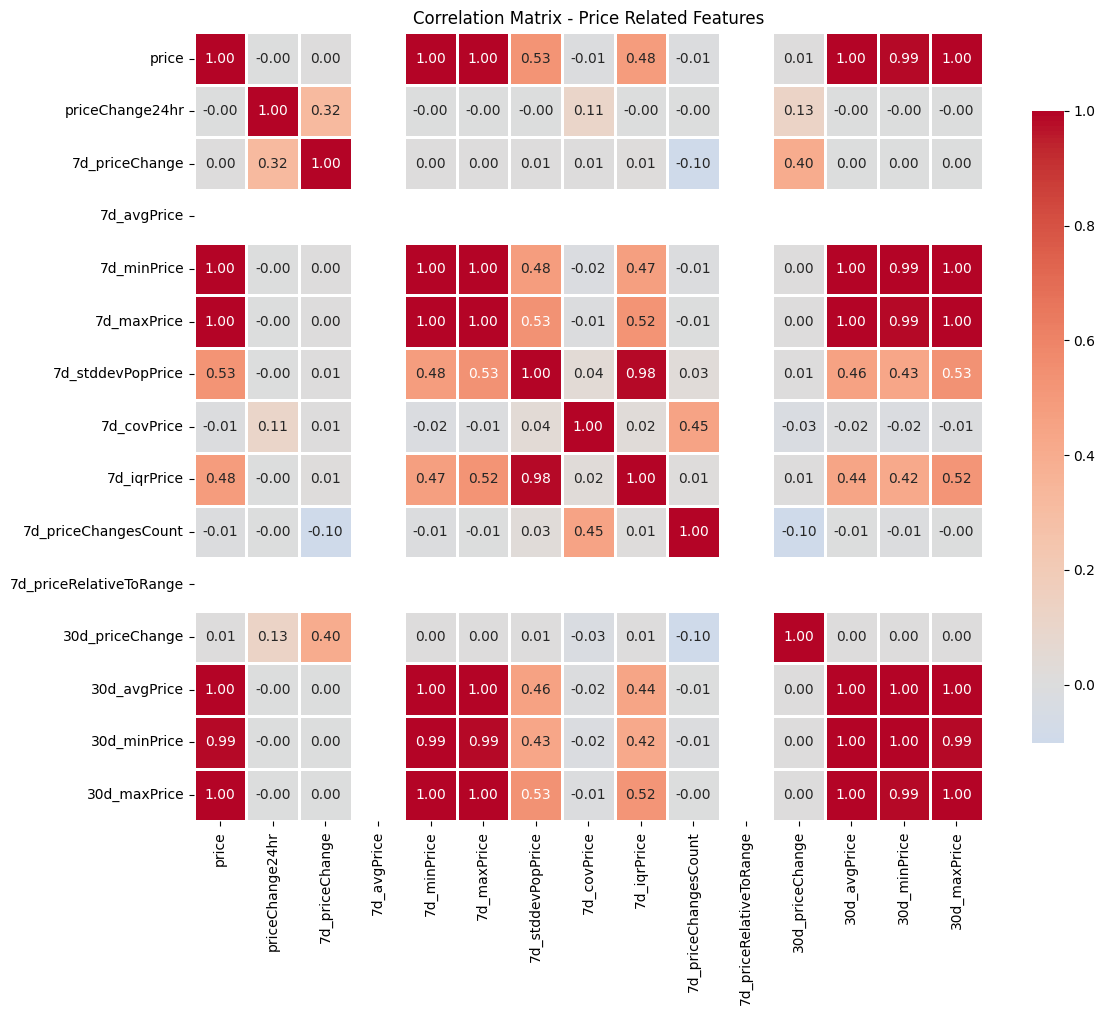


Strongest Correlations with Current Price:
price                1.000000
7d_maxPrice          0.999834
30d_maxPrice         0.999311
7d_minPrice          0.997915
30d_avgPrice         0.995346
30d_minPrice         0.988600
7d_stddevPopPrice    0.531003
7d_iqrPrice          0.484055
30d_priceChange      0.005207
7d_priceChange       0.004233
Name: price, dtype: float64


In [27]:
# Correlation between price and various metrics
numeric_cols = cards_df.select_dtypes(include=[np.number]).columns.tolist()

# Select key price-related columns
price_cols = [col for col in numeric_cols if 'price' in col.lower() or 'Price' in col]
# Make sure 'price' is included and is first
if 'price' in cards_df.columns and 'price' not in price_cols:
    price_cols = ['price'] + price_cols
elif 'price' in price_cols:
    # Move 'price' to front
    price_cols.remove('price')
    price_cols = ['price'] + price_cols

price_cols = price_cols[:15]  # Limit to 15 columns for readability

if len(price_cols) > 1 and 'price' in price_cols:
    # Only keep columns that exist and have numeric data
    valid_price_cols = [col for col in price_cols if col in cards_df.columns]
    
    correlation_matrix = cards_df[valid_price_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix - Price Related Features')
    plt.tight_layout()
    plt.show()
    
    # Show strongest correlations with current price
    if 'price' in correlation_matrix.columns:
        price_correlations = correlation_matrix['price'].sort_values(ascending=False)
        print("\nStrongest Correlations with Current Price:")
        print("="*60)
        print(price_correlations.head(10))
    else:
        print("\n'price' column not found in correlation matrix")
else:
    print("Not enough price columns for correlation analysis or 'price' column not found")

In [29]:
# Generate automated insights
print("=" * 80)
print("KEY INSIGHTS FROM TRADING CARD MARKET ANALYSIS")
print("=" * 80)

print(f"\nDATASET OVERVIEW:")
print(f"   • Total card variants: {len(cards_df):,}")
print(f"   • Unique cards: {cards_df['card_id'].nunique():,}")
print(f"   • Games covered: {cards_df['game'].nunique()}")
print(f"   • Date range: {pd.to_datetime(cards_df['lastUpdated'], unit='s').min().date()} to {pd.to_datetime(cards_df['lastUpdated'], unit='s').max().date()}")

print(f"\nPRICE STATISTICS:")
print(f"   • Average card price: ${cards_df['price'].mean():.2f}")
print(f"   • Median card price: ${cards_df['price'].median():.2f}")
print(f"   • Most expensive card: ${cards_df['price'].max():.2f}")
print(f"   • Cheapest card: ${cards_df['price'].min():.2f}")
print(f"   • Price standard deviation: ${cards_df['price'].std():.2f}")

print(f"\nGAME BREAKDOWN:")
game_counts = cards_df.groupby('game')['card_id'].nunique().sort_values(ascending=False)
for game, count in game_counts.items():
    avg_price = cards_df[cards_df['game'] == game]['price'].mean()
    print(f"   • {game}: {count:,} unique cards (avg: ${avg_price:.2f})")

print(f"\nMARKET TRENDS:")
if '30d_priceChange' in cards_df.columns:
    avg_change = cards_df['30d_priceChange'].mean()
    pct_increasing = (cards_df['30d_priceChange'] > 0).sum() / len(cards_df) * 100
    print(f"   • Average 30-day price change: ${avg_change:.2f}")
    print(f"   • Cards increasing in price: {pct_increasing:.1f}%")

print(f"\nCONDITION IMPACT:")
condition_premium = cards_df.groupby('condition')['price'].mean().sort_values(ascending=False)
if len(condition_premium) > 0:
    best_condition = condition_premium.index[0]
    worst_condition = condition_premium.index[-1]
    premium_pct = ((condition_premium.iloc[0] / condition_premium.iloc[-1]) - 1) * 100
    print(f"   • Best condition ({best_condition}): ${condition_premium.iloc[0]:.2f}")
    print(f"   • Worst condition ({worst_condition}): ${condition_premium.iloc[-1]:.2f}")
    print(f"   • Premium for best vs worst: {premium_pct:.1f}%")

print("\n" + "=" * 80)

KEY INSIGHTS FROM TRADING CARD MARKET ANALYSIS

DATASET OVERVIEW:
   • Total card variants: 48,134
   • Unique cards: 15,503
   • Games covered: 6
   • Date range: 2025-03-26 to 2025-11-21

PRICE STATISTICS:
   • Average card price: $23.43
   • Median card price: $2.75
   • Most expensive card: $32999.99
   • Cheapest card: $0.01
   • Price standard deviation: $272.92

GAME BREAKDOWN:
   • mtg: 5,379 unique cards (avg: $28.03)
   • YuGiOh: 3,415 unique cards (avg: $9.23)
   • one-piece-card-game: 2,242 unique cards (avg: $28.87)
   • digimon-card-game: 2,095 unique cards (avg: $17.01)
   • Pokemon: 1,488 unique cards (avg: $37.30)
   • Disney Lorcana: 884 unique cards (avg: $12.99)

MARKET TRENDS:
   • Average 30-day price change: $-1.22
   • Cards increasing in price: 24.0%

CONDITION IMPACT:
   • Best condition (Sealed): $373.94
   • Worst condition (Heavily Played): $9.72
   • Premium for best vs worst: 3746.3%

